Training model...
Testing model...

 [[110   4]
 [  8  48]]

Accuracy 0.9294117647058824
Precision: 0.9291970243116804
Recall: 0.9294117647058824
F-1 Score: 0.9294117647058824

               precision    recall  f1-score   support

           0       0.93      0.96      0.95       114
           1       0.92      0.86      0.89        56

    accuracy                           0.93       170
   macro avg       0.93      0.91      0.92       170
weighted avg       0.93      0.93      0.93       170


 [0.93220339 0.92307692]

 [0.96491228 0.85714286]

 [0.94827586 0.88888889]


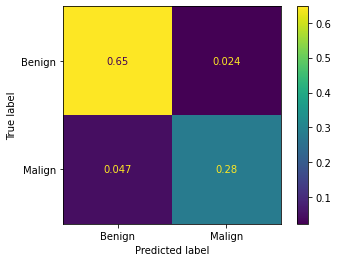

In [83]:
import pandas as pd
from scipy.stats import norm   
# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import numpy as np

dataCsv = pd.read_csv("data/breast-cancer.csv")
dataframe = dataCsv.fillna(dataCsv.mean()).drop(
    [203, 433, 549]).drop(columns=['ID'])
dataframe['Diagnosis'].replace('M', 1, inplace=True)
dataframe['Diagnosis'].replace('B', 0, inplace=True)

X = dataframe.drop('Diagnosis', axis=1)
y = dataframe['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()

print("Training model...")
model = model.fit(X_train,y_train)

print("Testing model...")
y_pred = model.predict(X_test)

print("\n", metrics.confusion_matrix(y_test, y_pred))

print("\nAccuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="weighted"))
print("F-1 Score:",f1_score(y_test, y_pred, average='micro'))
print("\n", metrics.classification_report(y_test, y_pred))

print("\n", metrics.precision_score(y_test, y_pred, average=None))

print("\n", metrics.recall_score(y_test, y_pred, average=None))

print("\n", metrics.f1_score(y_test, y_pred, average=None))

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign','Malign'])
cmd.plot()